In [262]:
#Import the datasets and libraries, check datatype, statistical summary,shape,null values or incorrect imputation.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Load data
pdata = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
# Check datatype
pdata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [263]:
# View top 5 rows
pdata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [265]:
# Statistical summary
pdata.describe()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [266]:
# Check null data and filter bad data
pdata.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [267]:
# Check shape of data
pdata.shape

(5000, 14)

In [268]:
# EDA. Number of unique in each column
unique_values = pdata.nunique()
print('Count unique values in each column')
print(unique_values)


Count unique values in each column
ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64


In [269]:
pdata['ID'].unique()

array([   1,    2,    3, ..., 4998, 4999, 5000])

In [270]:
pdata['Age'].unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23])

In [271]:
pdata['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [274]:
# Cleanup bad data
pdata['Experience'].replace({-1:1,-2:2,-3:3}, inplace=True)

In [273]:
pdata['Income'].unique()

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218])

In [276]:
pdata['ZIP Code'].unique()

array([91107, 90089, 94720, 94112, 91330, 92121, 91711, 93943, 93023,
       94710, 90277, 93106, 94920, 91741, 95054, 95010, 94305, 91604,
       94015, 90095, 91320, 95521, 95064, 90064, 94539, 94104, 94117,
       94801, 94035, 92647, 95814, 94114, 94115, 92672, 94122, 90019,
       95616, 94065, 95014, 91380, 95747, 92373, 92093, 94005, 90245,
       95819, 94022, 90404, 93407, 94523, 90024, 91360, 95670, 95123,
       90045, 91335, 93907, 92007, 94606, 94611, 94901, 92220, 93305,
       95134, 94612, 92507, 91730, 94501, 94303, 94105, 94550, 92612,
       95617, 92374, 94080, 94608, 93555, 93311, 94704, 92717, 92037,
       95136, 94542, 94143, 91775, 92703, 92354, 92024, 92831, 92833,
       94304, 90057, 92130, 91301, 92096, 92646, 92182, 92131, 93720,
       90840, 95035, 93010, 94928, 95831, 91770, 90007, 94102, 91423,
       93955, 94107, 92834, 93117, 94551, 94596, 94025, 94545, 95053,
       90036, 91125, 95120, 94706, 95827, 90503, 90250, 95817, 95503,
       93111, 94132,

In [277]:
pdata['Family'].unique()

array([4, 3, 1, 2])

In [278]:
pdata['CCAvg'].unique()

array([ 1.6 ,  1.5 ,  1.  ,  2.7 ,  0.4 ,  0.3 ,  0.6 ,  8.9 ,  2.4 ,
        0.1 ,  3.8 ,  2.5 ,  2.  ,  4.7 ,  8.1 ,  0.5 ,  0.9 ,  1.2 ,
        0.7 ,  3.9 ,  0.2 ,  2.2 ,  3.3 ,  1.8 ,  2.9 ,  1.4 ,  5.  ,
        2.3 ,  1.1 ,  5.7 ,  4.5 ,  2.1 ,  8.  ,  1.7 ,  0.  ,  2.8 ,
        3.5 ,  4.  ,  2.6 ,  1.3 ,  5.6 ,  5.2 ,  3.  ,  4.6 ,  3.6 ,
        7.2 ,  1.75,  7.4 ,  2.67,  7.5 ,  6.5 ,  7.8 ,  7.9 ,  4.1 ,
        1.9 ,  4.3 ,  6.8 ,  5.1 ,  3.1 ,  0.8 ,  3.7 ,  6.2 ,  0.75,
        2.33,  4.9 ,  0.67,  3.2 ,  5.5 ,  6.9 ,  4.33,  7.3 ,  4.2 ,
        4.4 ,  6.1 ,  6.33,  6.6 ,  5.3 ,  3.4 ,  7.  ,  6.3 ,  8.3 ,
        6.  ,  1.67,  8.6 ,  7.6 ,  6.4 , 10.  ,  5.9 ,  5.4 ,  8.8 ,
        1.33,  9.  ,  6.7 ,  4.25,  6.67,  5.8 ,  4.8 ,  3.25,  5.67,
        8.5 ,  4.75,  4.67,  3.67,  8.2 ,  3.33,  5.33,  9.3 ,  2.75])

In [279]:
pdata['Education'].unique()

array([1, 2, 3])

In [241]:
pdata['Mortgage'].unique()

array([  0, 155, 104, 134, 111, 260, 163, 159,  97, 122, 193, 198, 285,
       412, 153, 211, 207, 240, 455, 112, 336, 132, 118, 174, 126, 236,
       166, 136, 309, 103, 366, 101, 251, 276, 161, 149, 188, 116, 135,
       244, 164,  81, 315, 140,  95,  89,  90, 105, 100, 282, 209, 249,
        91,  98, 145, 150, 169, 280,  99,  78, 264, 113, 117, 325, 121,
       138,  77, 158, 109, 131, 391,  88, 129, 196, 617, 123, 167, 190,
       248,  82, 402, 360, 392, 185, 419, 270, 148, 466, 175, 147, 220,
       133, 182, 290, 125, 124, 224, 141, 119, 139, 115, 458, 172, 156,
       547, 470, 304, 221, 108, 179, 271, 378, 176,  76, 314,  87, 203,
       180, 230, 137, 152, 485, 300, 272, 144,  94, 208, 275,  83, 218,
       327, 322, 205, 227, 239,  85, 160, 364, 449,  75, 107,  92, 187,
       355, 106, 587, 214, 307, 263, 310, 127, 252, 170, 265, 177, 305,
       372,  79, 301, 232, 289, 212, 250,  84, 130, 303, 256, 259, 204,
       524, 157, 231, 287, 247, 333, 229, 357, 361, 294,  86, 32

In [280]:
pdata['Personal Loan'].unique()

array([0, 1])

In [281]:
pdata['Securities Account'].unique()

array([1, 0])

In [282]:
pdata['CD Account'].unique()

array([0, 1])

In [283]:
pdata['Online'].unique()

array([0, 1])

In [284]:
pdata['CreditCard'].unique()

array([0, 1])

In [285]:
# EDA. Number of people with zero mortgage
total_zero_mortgage_people = len(pdata.loc[pdata['Mortgage'] == 0])
print(f'Total number of people with zero mortgage: {total_zero_mortgage_people}')

Total number of people with zero mortgage: 3462


In [286]:
# EDA. Number of people with zero credit card spending per month
total_zero_spending_cc_people = len(pdata.loc[pdata['CCAvg'] == 0])
print(f'Total number of people with zero credit card spending per month: {total_zero_spending_cc_people}')

Total number of people with zero credit card spending per month: 106


In [287]:
def get_age_group(age):
    if age <= 35:
        return "Young_Adult"
    elif age > 35 and age<=55:
        return "Middle_Aged"
    else:
        return "Older_Adult"

In [288]:
def get_income_group(income):
    if income < 45:
        return "Low_Income"
    elif income > 46 and income < 139:
        return "Med_Income"
    elif income > 140 and income < 149:
        return "Upper_Med_Income"
    else:
        return "High_Income"

In [289]:
def get_experience_group(exp):
    if exp < 10:
        return "Low_Exp"
    elif exp > 10 and exp <=15:
        return "Med_Exp"
    else:
        return "High_Exp"
    

In [290]:
def get_cc_avg_group(cc_avg):
    if cc_avg <=3 :
        return "Low_CCAvg"
    elif cc_avg >=4 and cc_avg <= 6:
        return "Med_CCAvg"
    else:
        return "High_CCAvg"

In [291]:
pdata['AgeCat'] = pdata['Age'].apply(get_age_group)
pdata['IncomeCat'] = pdata['Income'].apply(get_income_group)
pdata['ExpCat'] = pdata['Experience'].apply(get_experience_group)
pdata['CCAvgCat'] = pdata['CCAvg'].apply(get_cc_avg_group)
pdata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,AgeCat,IncomeCat,ExpCat,CCAvgCat
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Young_Adult,Med_Income,Low_Exp,Low_CCAvg
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Middle_Aged,Low_Income,High_Exp,Low_CCAvg
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Middle_Aged,Low_Income,Med_Exp,Low_CCAvg
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,Young_Adult,Med_Income,Low_Exp,Low_CCAvg
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Young_Adult,High_Income,Low_Exp,Low_CCAvg


In [292]:
pdata = pd.get_dummies(pdata, drop_first=True)
pdata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,...,CreditCard,AgeCat_Older_Adult,AgeCat_Young_Adult,IncomeCat_Low_Income,IncomeCat_Med_Income,IncomeCat_Upper_Med_Income,ExpCat_Low_Exp,ExpCat_Med_Exp,CCAvgCat_Low_CCAvg,CCAvgCat_Med_CCAvg
0,1,25,1,49,91107,4,1.6,1,0,0,...,0,0,1,0,1,0,1,0,1,0
1,2,45,19,34,90089,3,1.5,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,3,39,15,11,94720,1,1.0,1,0,0,...,0,0,0,1,0,0,0,1,1,0
3,4,35,9,100,94112,1,2.7,2,0,0,...,0,0,1,0,1,0,1,0,1,0
4,5,35,8,45,91330,4,1.0,2,0,0,...,1,0,1,0,0,0,1,0,1,0


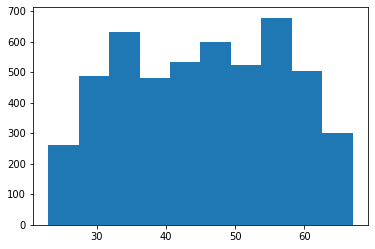

In [24]:
# EDA, Univariate Age
age_data = pdata['Age']
plt.hist(age_data, bins=20)
plt.show()

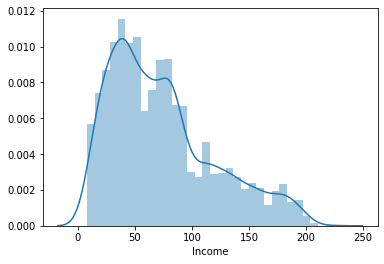

In [36]:
income_data = pdata['Income']
sns.distplot(income_data)

In [202]:
# EDA, multivariate 
pdata_clean = pdata.dropna()
pdata_clean.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,...,CD Account,Online,CreditCard,AgeCat_Older Adult,AgeCat_Young Adult,IncomeCat_Low Income,IncomeCat_Med Income,IncomeCat_Upper Med Income,ExpCat_Low Exp,ExpCat_Med Exp
0,1,25,1,49,91107,4,1.6,1,0,0,...,0,0,0,0,1,0,1,0,1,0
1,2,45,19,34,90089,3,1.5,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,4,35,9,100,94112,1,2.7,2,0,0,...,0,0,0,1,0,0,1,0,1,0
4,5,35,8,45,91330,4,1.0,2,0,0,...,0,0,1,1,0,0,0,0,1,0


In [203]:
sns.pairplot(pdata_clean)

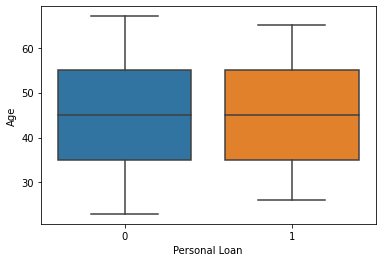

In [198]:
sns.boxplot(x='Personal Loan', y='Age', data=pdata_clean)

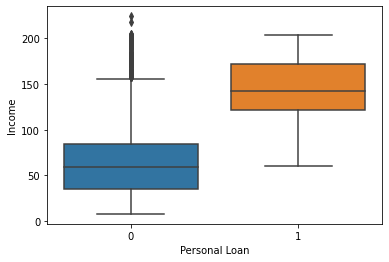

In [210]:
sns.boxplot(x='Personal Loan', y='Income', data=pdata_clean)

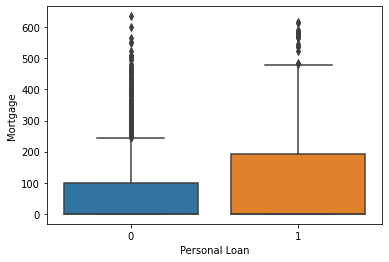

In [212]:
sns.boxplot(x='Personal Loan', y='Mortgage', data=pdata_clean)

In [261]:
# EDA. Number of people with zero credit card spending per month
total_young_adult_people = len(pdata.loc[pdata['AgeCat_Young_Adult'] == 1])
total_mid_aged_people = len(pdata.loc[pdata['AgeCat_Middle_Aged'] == 1])
total_older_adult_people = len(pdata.loc[pdata['AgeCat_Older_Adult'] == 1])
print(f'Total number of young people (<35) : {total_young_adult_people}')
print(f'Total number of mid-aged people (35-55): {total_mid_aged_people}')
print(f'Total number of old people (>55) : {total_older_adult_people}')

KeyError: 'AgeCat_Middle_Aged'